In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Load e inspeção do modelo CIFAR-10 dataset

O CIFAR-10 é um data set que consistem em um total de 60000 imagens coloridas, com 10 possiveis saídas:

- Avião;
- Automovel;
- Passaro;
- Gato;
- Veado;
- Cachorro;
- Sapo;
- Cavalo;
- Navio;
- Caminhão

In [2]:
# Importar dados e rescalar os pixels dos valores
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

#Conjuntos menores para acelerar o procedimento
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

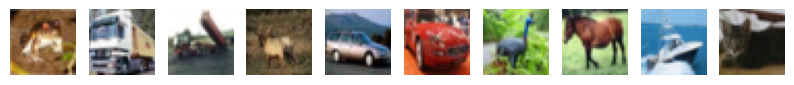

In [3]:
#Mostrar as 10 primeiras imagens
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

In [4]:
#Função para test de precisão do modelo
def get_test_accuracy(model, x_test, y_test):
      test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
      print("Accuracy: {acc:0.3f}".format(acc=test_acc))

In [5]:
#Criando a função de uma instancia simples de CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_new_model():
  model = Sequential([
       Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3,3), activation='relu', name='conv_1'),
       Conv2D(filters=8, kernel_size=(3,3), activation='relu', name='conv_2'),
       MaxPooling2D(pool_size=(4,4), name='pool_1'),
       Flatten(name='flatten'),
       Dense(units=32, activation='relu', name='dense_1'),
       Dense(units=10, activation='softmax', name='dense_2')

  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [6]:
#Ver o summary do modelo
model = get_new_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14,514
Trainable params: 14,514
Non-traina

In [7]:
#Testa a precisão do modelo
get_test_accuracy(model, x_test, y_test)

Accuracy: 0.089


# Treinando o modelo

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#Criando o checkpoint, para salvar ha cada epoca os pesos
#Utiliza o ModelCheckpoint, 
#Filepath o caminho onde sera salvo
#frequency quando sera feito esse salvamento
#save_weights_only para ver se salva os pesos
checkpoint_path = 'model_checkpoints/checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            verbose=1)

In [10]:
#Ajustando o modelo e salvando com o chekpoint

model.fit(x=x_train,
          y=y_train,
          epochs=3,
          callbacks=[checkpoint])

Epoch 1/3
310/313 [============================>.] - ETA: 0s - loss: 1.9884 - accuracy: 0.2787
Epoch 1: saving model to model_checkpoints\checkpoint
313/313 [==============================] - 5s 14ms/step - loss: 1.9854 - accuracy: 0.2798
Epoch 2/3
312/313 [============================>.] - ETA: 0s - loss: 1.6573 - accuracy: 0.4034
Epoch 2: saving model to model_checkpoints\checkpoint
313/313 [==============================] - 4s 14ms/step - loss: 1.6568 - accuracy: 0.4038
Epoch 3/3
311/313 [============================>.] - ETA: 0s - loss: 1.5263 - accuracy: 0.4489
Epoch 3: saving model to model_checkpoints\checkpoint
313/313 [==============================] - 4s 14ms/step - loss: 1.5259 - accuracy: 0.4491


Pode observa que apareceu a escrita "saving model to model_checkpoints\checkpoint", mostrnado que foi feito o salvamenteo

In [11]:
#Ver a perfomace do modelo de trainamento
get_test_accuracy(model, x_test, y_test)

Accuracy: 0.465


### Criar um novo modelo e utilizar os pesos do modelo antigo

In [12]:
#Criando a nova instancia de inicialização do modelo
model = get_new_model()
get_test_accuracy(model, x_test, y_test)

Accuracy: 0.090


In [13]:
#Baixando e utilizando os pesos para treinar o modelo
model.load_weights(checkpoint_path)
get_test_accuracy(model, x_test, y_test)

Accuracy: 0.465


Pode notar que foi igual ao modelo passado no valode 0.495

In [14]:
#ver o que tem na pasta dos checkpoints
import os
pasta = 'model_checkpoints'
itens = os.listdir(pasta)

for item in itens:
    if os.path.isfile(os.path.join(pasta, item)):
        print(item)

checkpoint
checkpoint.data-00000-of-00001
checkpoint.index


Analise do que tem nos itens aprensentados:

- checkpoint: Esse primeiro item tem os metadados 

* model_checkpoint_path: "checkpoint"
* all_model_checkpoint_paths: "checkpoint"

- checkpoint.index

Neste tem os fragmentos dos pesos que foi baixados, no caso so tem um fragmento, mas, se fosse feito outros checkpoints iriam aparecer mais fragmentos.
Esses fragmentos mostram onde esta os pesos de cada modelo trabalhado

- checkpoint.data-00000-of-00001

O Arquivo maior onde tem todos os pesos que foram salvos


### Salvando Modelo com criterios

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
#Criando no Tensorflow um checkpoint com epoch e batch detalhados

checkpoint_5000_path = \
              'model_checkpoints_5000/checkpoint_{epoch:02d}_{batch:04d}'
checkpoint_5000 = ModelCheckpoint(filepath=checkpoint_5000_path,
                                  save_weights_only=True,
                                  save_freq=5000,
                                  ferbose=1)


In [34]:
model = get_new_model()
model.fit(x=x_train,
          y=y_train,
          epochs=3,
          validation_data=(x_test,y_test),
          batch_size=10,
          callbacks=[checkpoint_5000])

Epoch 1/3
10/10 [==============================] - 1s 24ms/step - loss: 2.3191 - accuracy: 0.0600 - val_loss: 2.3098 - val_accuracy: 0.0900
Epoch 2/3
10/10 [==============================] - 0s 11ms/step - loss: 2.2816 - accuracy: 0.1900 - val_loss: 2.3119 - val_accuracy: 0.0600
Epoch 3/3
10/10 [==============================] - 0s 11ms/step - loss: 2.2615 - accuracy: 0.2300 - val_loss: 2.3274 - val_accuracy: 0.0900


### Trabalhando com salvamento de modelos com criterios 

In [35]:
x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

In [36]:
model = get_new_model()

In [37]:
#Criando o checkpoints para monitora a precisão da validação

checkpoint_best_path = 'modelo_checkpoints_best/checkpoints'
checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path,
                                  save_weights_only=True,
                                  save_freq='epoch',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  verbose=1
                                  )

In [38]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    batch_size=10,
                    callbacks=[checkpoint_best],
                    verbose=0
                    )


Epoch 1: val_accuracy improved from -inf to 0.09000, saving model to modelo_checkpoints_best\checkpoints

Epoch 2: val_accuracy did not improve from 0.09000

Epoch 3: val_accuracy improved from 0.09000 to 0.12000, saving model to modelo_checkpoints_best\checkpoints

Epoch 4: val_accuracy did not improve from 0.12000

Epoch 5: val_accuracy did not improve from 0.12000

Epoch 6: val_accuracy did not improve from 0.12000

Epoch 7: val_accuracy did not improve from 0.12000

Epoch 8: val_accuracy improved from 0.12000 to 0.14000, saving model to modelo_checkpoints_best\checkpoints

Epoch 9: val_accuracy did not improve from 0.14000

Epoch 10: val_accuracy improved from 0.14000 to 0.19000, saving model to modelo_checkpoints_best\checkpoints

Epoch 11: val_accuracy did not improve from 0.19000

Epoch 12: val_accuracy did not improve from 0.19000

Epoch 13: val_accuracy did not improve from 0.19000

Epoch 14: val_accuracy did not improve from 0.19000

Epoch 15: val_accuracy did not improve fr

<Axes: >

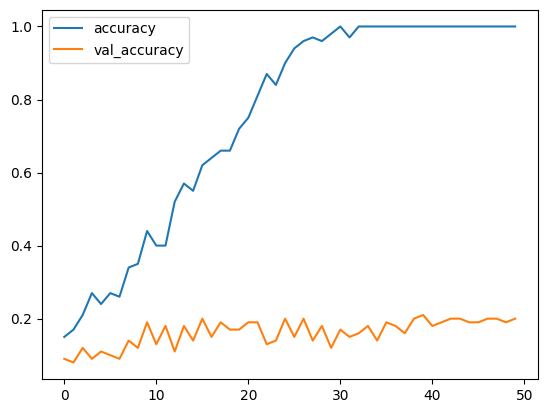

In [39]:
import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [40]:
new_model = get_new_model()
new_model.load_weights(checkpoint_best_path)
get_test_accuracy(new_model, x_test, y_test)

Accuracy: 0.210
